<a href="https://colab.research.google.com/github/jjoseph2008/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret_New_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
#!pip install pycaret

**Import Libraries**

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [131]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [132]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jjoseph2008/INSE6220/main/dataset_Facebook_edit_ordinal.csv',nrows=300)
df.head(25)

Type  Lifetime Post Total Reach  Lifetime Engaged Users  comment  like  \
0      1                       2752                     178        4    79   
1      3                      10460                    1457        5   130   
2      1                       2413                     177        0    66   
3      1                      50128                    2211       58  1572   
4      1                       7244                     671       19   325   
5      3                      10472                    1191        1   152   
6      1                      11692                     481        3   249   
7      1                      13720                     537        0   325   
8      3                      11844                    1530        0   161   
9      1                       4694                     280        3   113   
10     3                      21744                    4258        0   233   
11     1                       3112                     208        0    88   
12     1                       2847                     193        0    90   
13     1                       2549                     249        5   137   
14     1                      22784                     887        2   577   
15     3                      10060                    1264        4    86   
16     1                       1722                     163        2    40   
17     1                      53264                    1706       15   678   
18     3                       3930                     130        4    54   
19     1                       1591                     121        0    34   
20     1                       2848                     200        3    66   
21     1                       1384                      15        0     0   
22     4                       3454                     118        0    16   
23     1                       2723                     176        0    72   
24     3                       8488                    1341        3    99   

    share  Total Interactions  
0      17                 100  
1      29                 164  
2      14                  80  
3     147                1777  
4      49                 393  
5      33                 186  
6      27                 279  
7      14                 339  
8      31                 192  
9      26                 142  
10     19                 252  
11     18                 106  
12     14                 104  
13     10                 152  
14     20                 599  
15     18                 108  
16     12                  54  
17     20                 713  
18     17                  75  
19      8                  42  
20     12                  81  
21      0                   0  
22      2                  18  
23     24                  96  
24     19                 121

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Type                       300 non-null    int64
 1   Lifetime Post Total Reach  300 non-null    int64
 2   Lifetime Engaged Users     300 non-null    int64
 3   comment                    300 non-null    int64
 4   like                       300 non-null    int64
 5   share                      300 non-null    int64
 6   Total Interactions         300 non-null    int64
dtypes: int64(7)
memory usage: 16.5 KB


In [134]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [135]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

In [136]:
#sns.pairplot(df, hue='Type')
#plt.show()

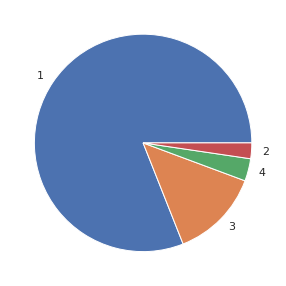

In [137]:
y =df['Type']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [138]:
X = df.drop(columns=['Type'])
X.head(10)

Lifetime Post Total Reach  Lifetime Engaged Users  comment  like  share  \
0                       2752                     178        4    79     17   
1                      10460                    1457        5   130     29   
2                       2413                     177        0    66     14   
3                      50128                    2211       58  1572    147   
4                       7244                     671       19   325     49   
5                      10472                    1191        1   152     33   
6                      11692                     481        3   249     27   
7                      13720                     537        0   325     14   
8                      11844                    1530        0   161     31   
9                       4694                     280        3   113     26   

   Total Interactions  
0                 100  
1                 164  
2                  80  
3                1777  
4                 393  
5                 186  
6                 279  
7                 339  
8                 192  
9                 142

In [139]:
X.describe().transpose()

count          mean           std    min     25%  \
Lifetime Post Total Reach  300.0  12994.043333  21011.685224  617.0  2645.0   
Lifetime Engaged Users     300.0    881.743333    980.156283   15.0   344.5   
comment                    300.0      8.533333     25.139521    0.0     1.0   
like                       300.0    190.363333    364.815276    0.0    57.0   
share                      300.0     27.523333     50.872680    0.0    10.0   
Total Interactions         300.0    226.420000    435.276889    0.0    71.0   

                              50%       75%       max  
Lifetime Post Total Reach  4498.0  13754.00  180480.0  
Lifetime Engaged Users      541.0    988.00    8072.0  
comment                       3.0      7.25     372.0  
like                        104.0    202.00    5172.0  
share                        18.0     31.25     790.0  
Total Interactions          126.0    243.00    6334.0

**Standardize the Data**

In [140]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Lifetime Post Total Reach  Lifetime Engaged Users   comment      like  \
0                  -0.488260               -0.719191 -0.180628 -0.305770   
1                  -0.120803                0.587884 -0.140784 -0.165739   
2                  -0.504420               -0.720213 -0.340006 -0.341464   
3                   1.770253                1.358434  1.970973  3.793550   
4                  -0.274117               -0.215369  0.417039  0.369671   
5                  -0.120231                0.316045 -0.300162 -0.105334   
6                  -0.062071               -0.409540 -0.220473  0.160998   
7                   0.034608               -0.352310 -0.340006  0.369671   
8                  -0.054825                0.662486 -0.340006 -0.080623   
9                  -0.395680               -0.614952 -0.220473 -0.212416   

      share  Total Interactions  
0 -0.207202           -0.290921  
1  0.029075           -0.143643  
2 -0.266271           -0.336946  
3  2.352467            3.568236  
4  0.422870            0.383338  
5  0.107834           -0.093016  
6 -0.010304            0.120999  
7 -0.266271            0.259072  
8  0.068455           -0.079208  
9 -0.029994           -0.194270

In [141]:
X.describe().transpose()

count          mean       std       min       25%  \
Lifetime Post Total Reach  300.0 -6.689094e-17  1.001671 -0.590039 -0.493360   
Lifetime Engaged Users     300.0 -4.806341e-17  1.001671 -0.885768 -0.549036   
comment                    300.0 -4.514907e-17  1.001671 -0.340006 -0.300162   
like                       300.0 -4.773959e-17  1.001671 -0.522679 -0.366175   
share                      300.0  1.954455e-17  1.001671 -0.541928 -0.345030   
Total Interactions         300.0  2.016905e-17  1.001671 -0.521044 -0.357657   

                                50%       75%        max  
Lifetime Post Total Reach -0.405024  0.036229   7.984405  
Lifetime Engaged Users    -0.348223  0.108589   7.348084  
comment                   -0.220473 -0.051134  14.482136  
like                      -0.237127  0.031951  13.678046  
share                     -0.187512  0.073377  15.012982  
Total Interactions        -0.231089  0.038154  14.054927

**Observations and variables**

In [142]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

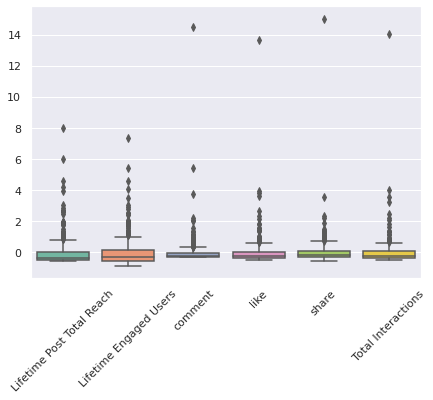

In [143]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

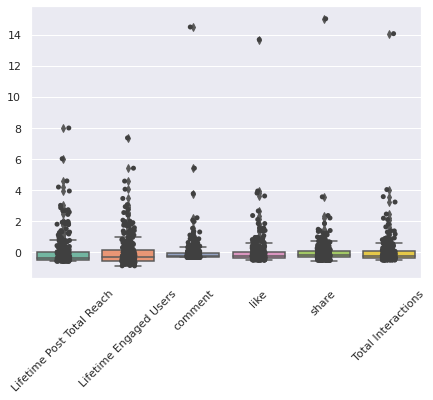

In [144]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

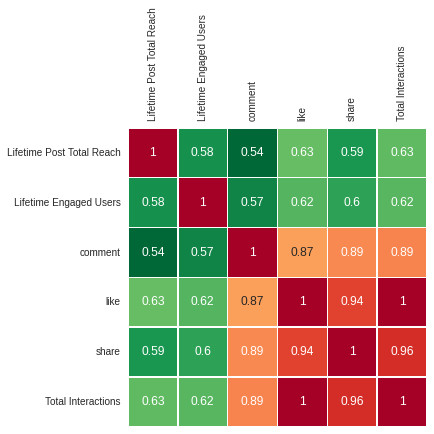

In [207]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

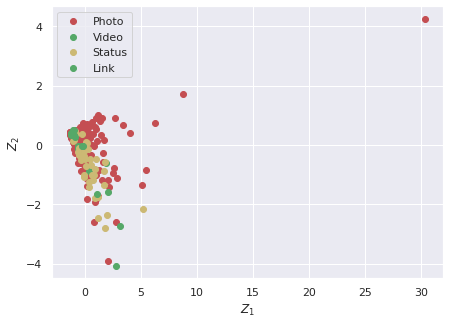

In [146]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Photo), 2(Video), 3(Status), 4(Link)
# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Photo = np.where(y == 1)
idx_Video = np.where(y == 2)
idx_Status = np.where(y == 3)
idx_Link = np.where(y == 4)

plt. figure()
plt.scatter(Z[idx_Photo,0], Z[idx_Photo,1], c='r', label='Photo')
plt.scatter(Z[idx_Video,0], Z[idx_Video,1], c='g', label='Video')
plt.scatter(Z[idx_Status,0], Z[idx_Status,1], c='y', label='Status')
plt.scatter(Z[idx_Link,0], Z[idx_Link,1], c='g', label='Link')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

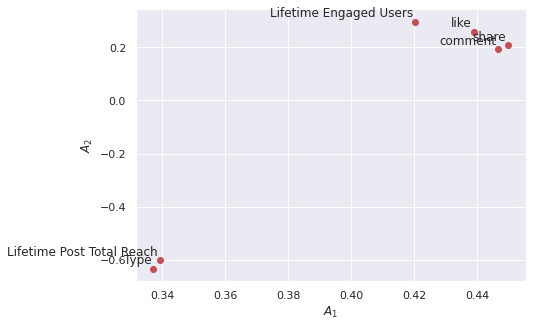

In [147]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


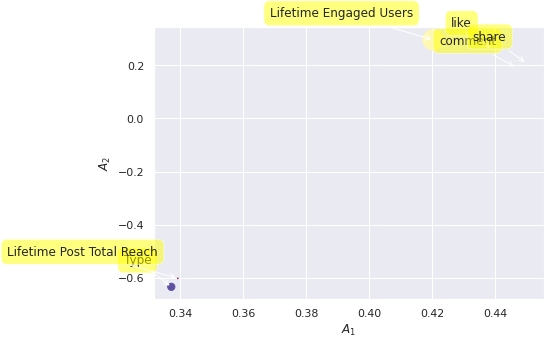

In [148]:

plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

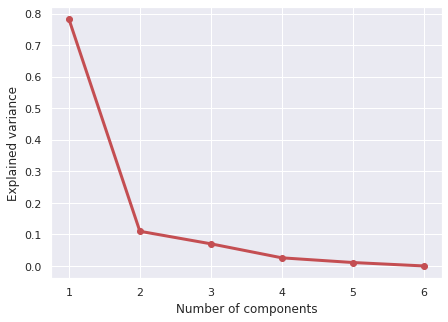

In [149]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

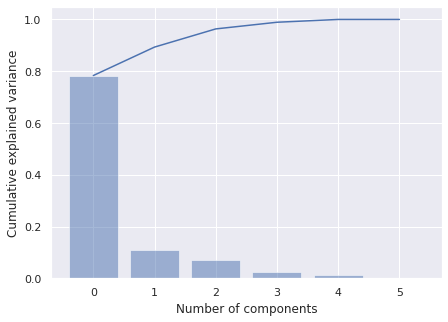

In [150]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

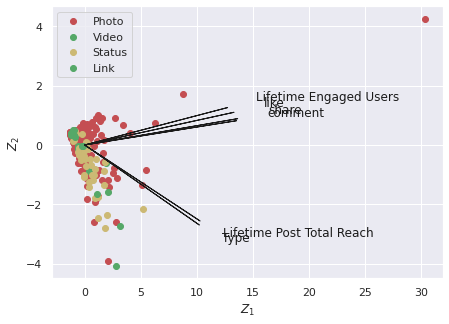

In [151]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Photo,0], Z[idx_Photo,1], c='r', label='Photo')
plt.scatter(Z[idx_Video,0], Z[idx_Video,1], c='g', label='Video')
plt.scatter(Z[idx_Status,0], Z[idx_Status,1], c='y', label='Status')
plt.scatter(Z[idx_Link,0], Z[idx_Link,1], c='g', label='Link')


#plt.scatter(Z[idx_Photo,0], Z[idx_Photo,1], c='r', label='Rosa')
#plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [152]:
!pip install pca

In [153]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [154]:
out['PC']

PC1       PC2       PC3
0   -0.842941  0.515868  0.170124
1   -0.026335 -0.373392 -0.513275
2   -0.978300  0.447711  0.164691
3    6.218359  0.727280  0.423902
4    0.532974  0.687706 -0.024619
..        ...       ...       ...
295 -0.896844 -0.263845 -0.142489
296  0.197888  0.323510 -0.213896
297 -0.790986  0.234092 -0.099494
298  1.018682 -1.829628  1.296064
299  0.262992  0.071637 -0.084596

[300 rows x 3 columns]

**Scatter plot**

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f07191590>)

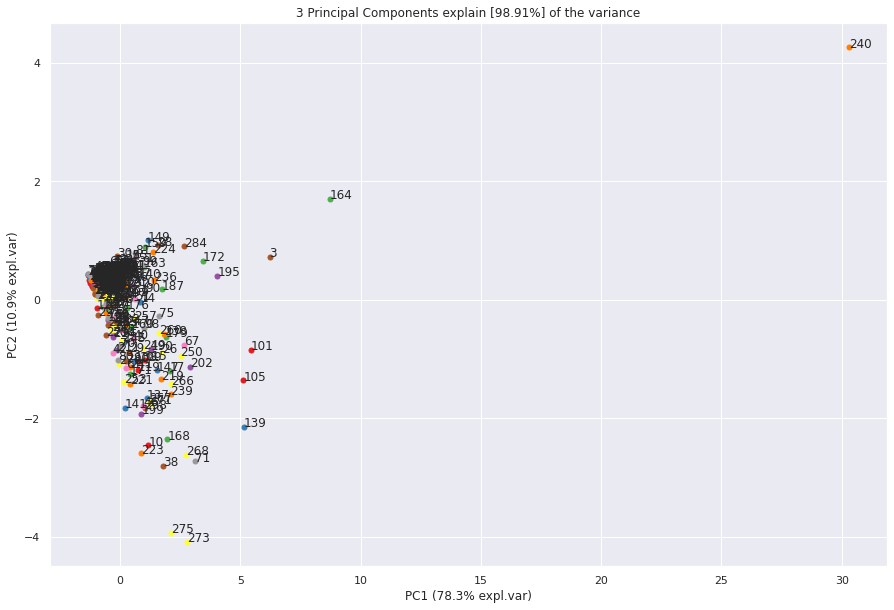

In [155]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [156]:
A = out['loadings'].T

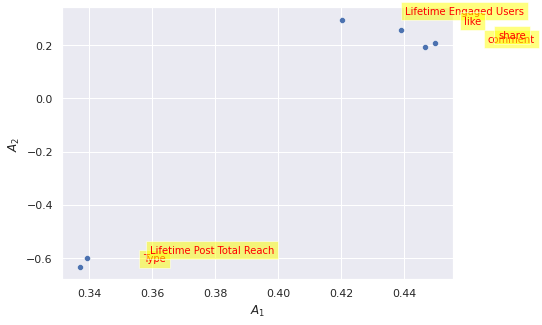

In [159]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

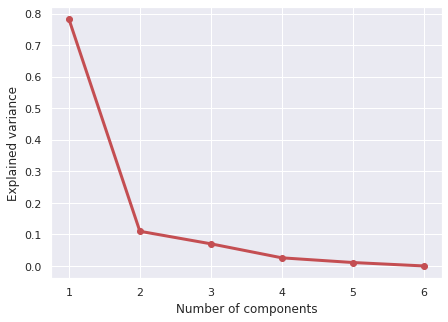

In [160]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

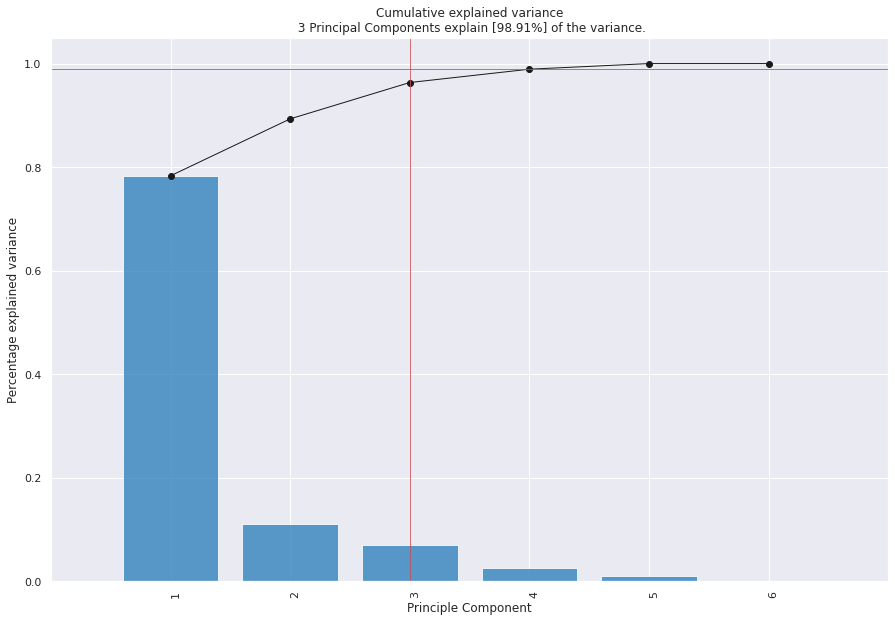

<Figure size 504x360 with 0 Axes>

In [161]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


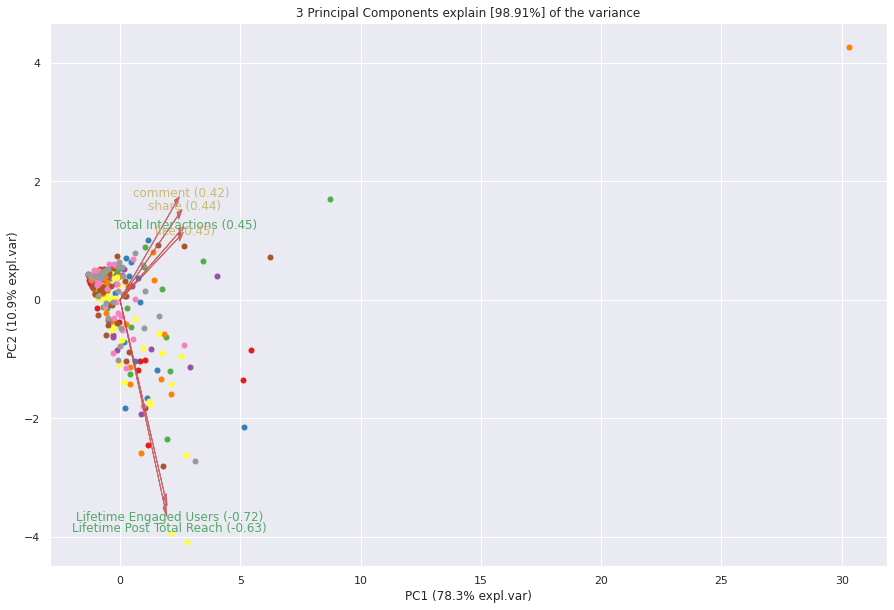

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f0630bdd0>)

In [162]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


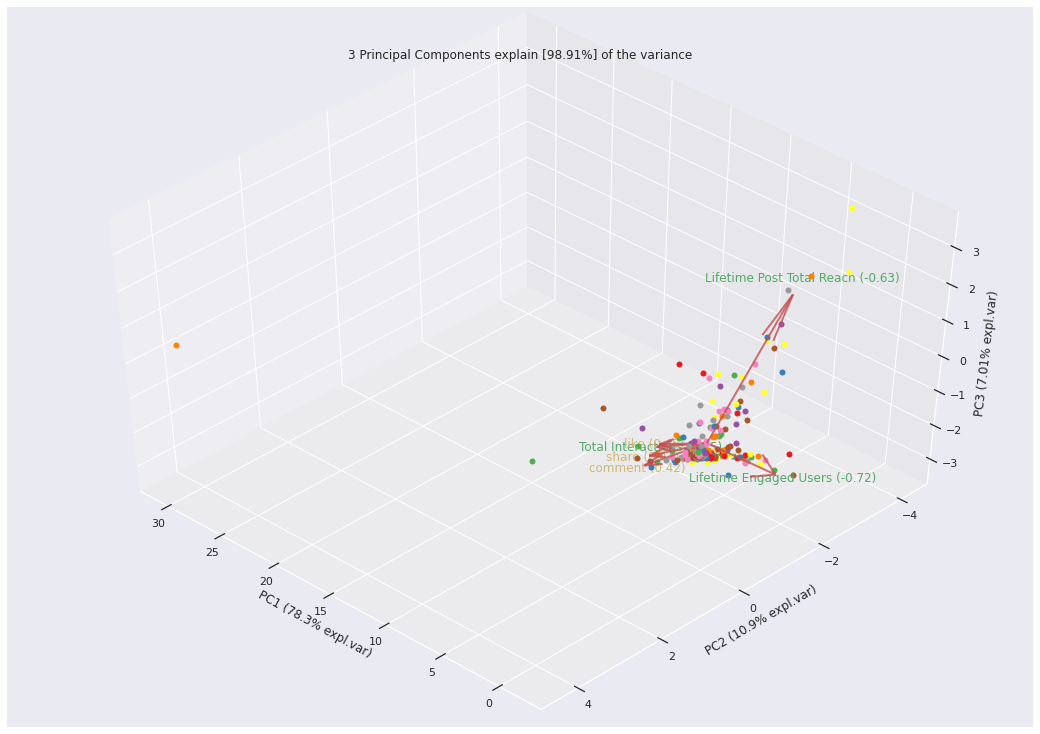

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f9f06422210>)

In [163]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [164]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [165]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [166]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (270, 7)
Unseen Data For Predictions: (30, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [168]:
from pycaret.classification import *
clf = setup(data=data, target='Type', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target              Type
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 5)
12                    Transformed Test Set           (82, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5438
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [169]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9047  0.0991  0.6011  0.8765   
rf               Random Forest Classifier    0.9044  0.0990  0.5701  0.8559   
qda       Quadratic Discriminant Analysis    0.8991  0.0875  0.5808  0.8519   
et                 Extra Trees Classifier    0.8936  0.0968  0.5408  0.8467   
knn                K Neighbors Classifier    0.8880  0.0826  0.5544  0.8418   
lda          Linear Discriminant Analysis    0.8778  0.0924  0.5815  0.8360   
ridge                    Ridge Classifier    0.8725  0.0000  0.5219  0.8201   
gbc          Gradient Boosting Classifier    0.8673  0.0947  0.5272  0.8599   
dt               Decision Tree Classifier    0.8506  0.0721  0.4828  0.8505   
dummy                    Dummy Classifier    0.8035  0.0500  0.3250  0.6461   
nb                            Naive Bayes    0.7930  0.0922  0.5006  0.8214   
lr                    Logistic Regression    0.7509  0.0811  0.4335  0.7625   
ada                  Ada Boost Classifier    0.7398  0.0675  0.3622  0.7000   
svm                   SVM - Linear Kernel    0.6614  0.0000  0.3671  0.6842   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.8847  0.6499  0.6852     0.104  
rf        0.8749  0.6377  0.6747     0.498  
qda       0.8705  0.6371  0.6701     0.017  
et        0.8626  0.5835  0.6350     0.477  
knn       0.8578  0.5816  0.6185     0.118  
lda       0.8487  0.5528  0.5922     0.017  
ridge     0.8357  0.4755  0.5180     0.017  
gbc       0.8544  0.5557  0.5784     0.356  
dt        0.8453  0.5391  0.5579     0.017  
dummy     0.7161  0.0000  0.0000     0.012  
nb        0.7961  0.4114  0.4359     0.018  
lr        0.7505  0.2956  0.3062     0.719  
ada       0.7131  0.1033  0.1094     0.113  
svm       0.6482  0.0685  0.0799     0.062

In [170]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [171]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.0000  0.3750  0.8978  0.8868  0.5632  0.5857
1       0.8947  0.0000  0.8667  0.8947  0.8947  0.6984  0.6984
2       0.8947  0.0000  0.4167  0.8980  0.8903  0.6696  0.6860
3       0.7895  0.0000  0.5111  0.7895  0.7895  0.3968  0.3968
4       0.9474  0.0000  0.5000  0.9474  0.9474  0.8504  0.8571
5       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
6       0.7368  0.0000  0.3000  0.7632  0.7474  0.2636  0.2657
7       0.8421  0.7206  0.3750  0.7492  0.7928  0.4412  0.4786
8       0.8333  0.0000  0.4778  0.8333  0.8333  0.4255  0.4255
9       0.7778  0.0000  0.4500  0.8778  0.8042  0.4627  0.5153
Mean    0.8506  0.0721  0.4828  0.8505  0.8453  0.5391  0.5579
SD      0.0629  0.2162  0.1469  0.0621  0.0586  0.1646  0.1661

In [172]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [173]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.0000  0.5000  0.8538  0.8627  0.4648  0.5500
1       0.7895  0.0000  0.4222  0.7291  0.7539  0.2400  0.2593
2       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
3       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
4       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
5       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
6       0.8421  0.0000  0.5333  0.7961  0.8183  0.4911  0.5001
7       0.8421  0.9266  0.4833  0.7895  0.8070  0.5547  0.5685
8       0.7778  0.0000  0.4556  0.7778  0.7778  0.2340  0.2340
9       0.8889  0.0000  0.5000  0.8464  0.8553  0.4627  0.5484
Mean    0.8614  0.0927  0.5117  0.8211  0.8341  0.4927  0.5339
SD      0.0438  0.2780  0.0452  0.0426  0.0400  0.1418  0.1556

In [174]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [175]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 10.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


How to analyze model performance using various plots

In [176]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [177]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.0000  0.5000  0.8538  0.8627  0.4648  0.5500
1       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
2       0.8421  0.0000  0.4444  0.8158  0.7967  0.3523  0.4603
3       0.9474  0.0000  0.6667  0.8980  0.9219  0.8304  0.8456
4       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
5       0.9474  0.0000  0.6667  0.8980  0.9219  0.8304  0.8456
6       0.8421  0.0000  0.5333  0.7961  0.8183  0.4911  0.5001
7       0.8947  0.8260  0.5000  0.8103  0.8482  0.6696  0.6893
8       0.8333  0.0000  0.4778  0.7847  0.8082  0.3250  0.3352
9       0.8889  0.0000  0.6444  0.8519  0.8667  0.6129  0.6197
Mean    0.8880  0.0826  0.5544  0.8418  0.8578  0.5816  0.6185
SD      0.0380  0.2478  0.0759  0.0373  0.0404  0.1660  0.1541

**Tune K Neighbors Model**

In [178]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.0000  0.5000  0.8538  0.8627  0.4648  0.5500
1       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
2       0.8421  0.0000  0.3333  0.8980  0.8430  0.5169  0.5434
3       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
4       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
5       0.8947  0.0000  0.4167  0.8980  0.8903  0.6696  0.6860
6       0.9474  0.0000  0.6667  0.8980  0.9219  0.8304  0.8456
7       0.8421  0.8294  0.3750  0.7492  0.7928  0.4412  0.4786
8       0.8333  0.0000  0.4778  0.7847  0.8082  0.3250  0.3352
9       0.8889  0.0000  0.5000  0.8464  0.8553  0.4627  0.5484
Mean    0.8827  0.0829  0.4936  0.8492  0.8574  0.5571  0.5997
SD      0.0327  0.2488  0.0935  0.0463  0.0351  0.1362  0.1325

**Evaluate K Neighbors Model**

In [179]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [180]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.0000  0.5938  0.9175  0.8659  0.5128  0.5262
1       0.7368  0.0000  0.4000  0.6941  0.7148  0.1518  0.1546
2       0.7368  0.0000  0.4333  0.8184  0.7617  0.4277  0.4613
3       0.6316  0.0000  0.3556  0.6519  0.6384  0.0221  0.0226
4       0.7368  0.0000  0.3667  0.7556  0.7436  0.3165  0.3222
5       0.7368  0.0000  0.3667  0.7919  0.7556  0.3709  0.3872
6       0.6842  0.0000  0.3778  0.6711  0.6767  0.0806  0.0813
7       0.7368  0.8111  0.3417  0.7105  0.7193  0.2578  0.2642
8       0.8333  0.0000  0.4778  0.7847  0.8082  0.3250  0.3352
9       0.8333  0.0000  0.6222  0.8294  0.8212  0.4906  0.5068
Mean    0.7509  0.0811  0.4335  0.7625  0.7505  0.2956  0.3062
SD      0.0645  0.2433  0.0954  0.0781  0.0649  0.1590  0.1662

**Tune Logistic Regression Model**

In [181]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.0000  0.5938  0.9175  0.8659  0.5128  0.5262
1       0.7895  0.0000  0.7333  0.7895  0.7895  0.3968  0.3968
2       0.7895  0.0000  0.4500  0.8235  0.7951  0.4967  0.5186
3       0.6316  0.0000  0.3556  0.6519  0.6384  0.0221  0.0226
4       0.7895  0.0000  0.3833  0.8383  0.8131  0.4610  0.4666
5       0.7368  0.0000  0.3667  0.7919  0.7556  0.3709  0.3872
6       0.6842  0.0000  0.3778  0.6711  0.6767  0.0806  0.0813
7       0.7368  0.8203  0.3417  0.7105  0.7193  0.2578  0.2642
8       0.8333  0.0000  0.4778  0.7847  0.8082  0.3250  0.3352
9       0.7778  0.0000  0.6000  0.8248  0.7884  0.4000  0.4214
Mean    0.7611  0.0820  0.4680  0.7804  0.7650  0.3324  0.3420
SD      0.0619  0.2461  0.1258  0.0772  0.0651  0.1586  0.1637

**Evaluate Logistic Regression Model**

In [182]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [183]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.0000  0.4792  0.7957  0.8182  0.3294  0.3395
1       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
2       0.9474  0.0000  0.6667  0.8980  0.9219  0.8304  0.8456
3       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
4       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
5       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
6       0.9474  0.0000  0.6667  0.8980  0.9219  0.8304  0.8456
7       0.8947  0.9896  0.5000  0.8103  0.8482  0.6696  0.6893
8       0.8889  0.0000  0.5000  0.8464  0.8553  0.4627  0.5484
9       0.9444  0.0000  0.6667  0.8924  0.9176  0.7750  0.7994
Mean    0.9044  0.0990  0.5701  0.8559  0.8749  0.6377  0.6747
SD      0.0314  0.2969  0.0685  0.0327  0.0329  0.1487  0.1423

**Tune Random Forest Model**

In [184]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.0000  0.7708  0.8521  0.8088  0.4154  0.4380
1       0.6842  0.0000  0.3500  0.8026  0.7335  0.3174  0.3373
2       0.8947  0.0000  0.9556  0.9342  0.9035  0.7500  0.7744
3       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
4       0.8421  0.0000  0.4000  0.8487  0.8394  0.5043  0.5167
5       0.8947  0.0000  0.4833  0.8947  0.8947  0.7008  0.7063
6       0.9474  0.0000  0.7333  1.0000  0.9728  0.8652  0.8758
7       0.9474  0.9940  0.7500  0.9123  0.9263  0.8527  0.8595
8       0.6111  0.0000  0.3889  0.7854  0.6781  0.1486  0.1701
9       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8506  0.0994  0.6388  0.8885  0.8624  0.6174  0.6348
SD      0.1165  0.2982  0.2244  0.0705  0.0959  0.2552  0.2500

**Evaluate Random Forest Model**

In [185]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [186]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8947  0.0000  0.8125  0.9211  0.8947  0.6238  0.6300
1       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
2       0.8947  0.0000  0.4167  0.8980  0.8903  0.6696  0.6860
3       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
4       0.8421  0.0000  0.4444  0.8158  0.7967  0.3523  0.4603
5       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
6       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
7       0.8947  0.9823  0.6250  0.8454  0.8693  0.6724  0.6841
8       0.8333  0.0000  0.4778  0.7847  0.8082  0.3250  0.3352
9       1.0000  0.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8939  0.0982  0.5999  0.8683  0.8725  0.6123  0.6475
SD      0.0420  0.2947  0.1692  0.0566  0.0521  0.1754  0.1618

In [187]:
tuned_best_model

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [188]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [191]:
clf_pca = setup(data=data, target='Type', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description             Value
0                               session_id               123
1                                   Target              Type
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (270, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (188, 2)
12                    Transformed Test Set           (82, 2)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              a89d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 2
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [192]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8301  0.0785  0.5431  0.8156   
dummy                    Dummy Classifier    0.8035  0.0500  0.3250  0.6461   
et                 Extra Trees Classifier    0.7985  0.0885  0.4154  0.7688   
knn                K Neighbors Classifier    0.7982  0.0807  0.3836  0.7484   
ada                  Ada Boost Classifier    0.7880  0.0709  0.4199  0.7239   
rf               Random Forest Classifier    0.7877  0.0782  0.4083  0.7546   
lr                    Logistic Regression    0.7874  0.0757  0.3497  0.6600   
svm                   SVM - Linear Kernel    0.7825  0.0000  0.3654  0.6794   
ridge                    Ridge Classifier    0.7822  0.0000  0.3164  0.6505   
gbc          Gradient Boosting Classifier    0.7766  0.0763  0.4534  0.7682   
lda          Linear Discriminant Analysis    0.7713  0.0743  0.3660  0.6605   
nb                            Naive Bayes    0.7664  0.0809  0.3565  0.6549   
qda       Quadratic Discriminant Analysis    0.7664  0.0784  0.3704  0.6723   
dt               Decision Tree Classifier    0.7608  0.0816  0.4193  0.7585   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.8177  0.4582  0.4726     0.066  
dummy     0.7161  0.0000  0.0000     0.012  
et        0.7719  0.2983  0.3288     0.472  
knn       0.7617  0.2226  0.2510     0.118  
ada       0.7462  0.2125  0.2498     0.115  
rf        0.7607  0.2481  0.2725     0.509  
lr        0.7171  0.0455  0.0513     0.031  
svm       0.7243  0.0845  0.0903     0.068  
ridge     0.7095  0.0052  0.0074     0.018  
gbc       0.7672  0.3064  0.3131     0.340  
lda       0.7094  0.0600  0.0684     0.017  
nb        0.7048  0.0433  0.0495     0.017  
qda       0.7139  0.0953  0.1040     0.019  
dt        0.7455  0.2412  0.2595     0.018

In [193]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Tune the Best Model**

In [194]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy   AUC  Recall   Prec.      F1  Kappa  MCC
0       0.8421  0.00  0.3333  0.7091  0.7699    0.0  0.0
1       0.7895  0.00  0.3333  0.6233  0.6966    0.0  0.0
2       0.7895  0.00  0.3333  0.6233  0.6966    0.0  0.0
3       0.7895  0.00  0.3333  0.6233  0.6966    0.0  0.0
4       0.7895  0.00  0.3333  0.6233  0.6966    0.0  0.0
5       0.7895  0.00  0.3333  0.6233  0.6966    0.0  0.0
6       0.7895  0.00  0.3333  0.6233  0.6966    0.0  0.0
7       0.7895  0.50  0.2500  0.6233  0.6966    0.0  0.0
8       0.8333  0.00  0.3333  0.6944  0.7576    0.0  0.0
9       0.8333  0.00  0.3333  0.6944  0.7576    0.0  0.0
Mean    0.8035  0.05  0.3250  0.6461  0.7161    0.0  0.0
SD      0.0216  0.15  0.0250  0.0351  0.0300    0.0  0.0

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [195]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [196]:
!pip install shap

     |████████████████████████████████| 564 kB 11.3 MB/s 


In [197]:
import shap

In [198]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.0000  0.2500  0.7218  0.6737 -0.0472 -0.0507
1       0.7895  0.0000  0.4222  0.8080  0.7697  0.2549  0.2768
2       0.7895  0.0000  0.4222  0.7291  0.7539  0.2400  0.2593
3       0.8421  0.0000  0.4444  0.8158  0.7967  0.3523  0.4603
4       0.8421  0.0000  0.5333  0.8158  0.8271  0.5403  0.5449
5       0.7368  0.0000  0.3111  0.6140  0.6699 -0.0795 -0.1039
6       0.7895  0.0000  0.4222  0.7291  0.7539  0.2400  0.2593
7       0.7895  0.7818  0.4667  0.7368  0.7544  0.4062  0.4163
8       0.7778  0.0000  0.3111  0.7292  0.7527  0.1111  0.1143
9       0.8889  0.0000  0.5000  0.8464  0.8553  0.4627  0.5484
Mean    0.7877  0.0782  0.4083  0.7546  0.7607  0.2481  0.2725
SD      0.0657  0.2345  0.0856  0.0647  0.0555  0.1951  0.2186

In [199]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6842  0.0000  0.4167  0.7949  0.7232  0.1915  0.2162
1       0.8421  0.0000  0.8444  0.8647  0.8482  0.5929  0.5998
2       0.8421  0.0000  0.4000  0.8421  0.8421  0.5512  0.5556
3       0.8947  0.0000  0.5556  0.8545  0.8664  0.6200  0.6698
4       0.8421  0.0000  0.5333  0.8158  0.8271  0.5403  0.5449
5       0.8421  0.0000  0.5333  0.7961  0.8183  0.4911  0.5001
6       0.8421  0.0000  0.5333  0.7961  0.8183  0.4911  0.5001
7       0.7895  0.9090  0.4667  0.7752  0.7680  0.4610  0.4818
8       0.7778  0.0000  0.4556  0.7778  0.7778  0.2340  0.2340
9       0.9444  0.0000  0.6667  0.8924  0.9176  0.7750  0.7994
Mean    0.8301  0.0909  0.5406  0.8209  0.8207  0.4948  0.5102
SD      0.0661  0.2727  0.1251  0.0381  0.0518  0.1644  0.1685

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

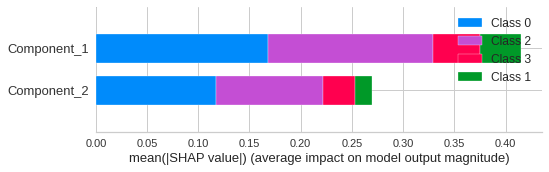

In [200]:
interpret_model(tuned_rf_pca, plot='summary')

In [201]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [202]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [203]:
interpret_model(tuned_rf_pca, plot='reason')